# JAX vs v PYTORCH
A simple neural network

In [8]:
## Common dataset
import jax
import jax.numpy as jnp

# Random data
key = jax.random.PRNGKey(0)
x = jax.random.normal(key, (100, 10))
true_w = jax.random.normal(key,(10, 1))
y = x @ true_w + 0.1 * jax.random.normal(key,(100, 1))

In [ ]:
import optax

def init_params(key):
    k1, k2 = jax.random.split(key)
    W1 = jax.random.normal(k1, (10, 64)) * jnp.sqrt(2 / 10)
    b1 = jnp.zeros((64,))
    W2 = jax.random.normal(k2, (64, 1)) * jnp.sqrt(2 / 64)
    b2 = jnp.zeros((1,))
    return (W1, b1, W2, b2)

def model(params, x):
    W1, b1, W2, b2 = params
    x = jax.nn.relu(x @ W1 + b1)
    return x @ W2 + b2

def loss_fn(params, x, y):
    preds = model(params, x)
    return jnp.mean((preds - y) ** 2)

@jax.jit
def update(params, opt_state, x, y):
    grads = jax.grad(loss_fn)(params, x, y)
    updates, opt_state = optimizer.update(grads, opt_state)
    new_params = optax.apply_updates(params, updates)
    return new_params, opt_state

# Train
key = jax.random.PRNGKey(0)
params = init_params(key)
optimizer = optax.adam(1e-3)
opt_state = optimizer.init(params)

for step in range(1000):
    params, opt_state = update(params, opt_state, x, y)


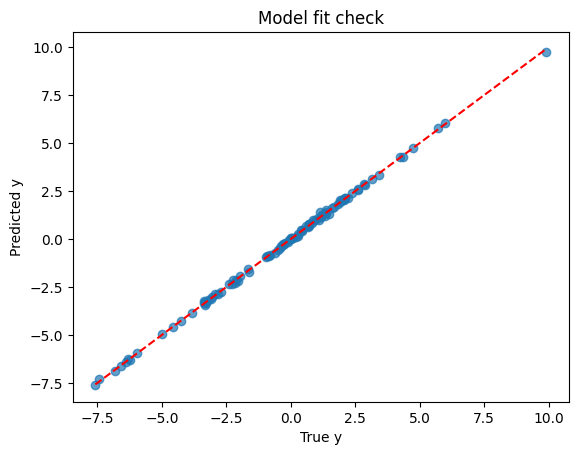

In [ ]:
import matplotlib.pyplot as plt

preds = model(params, x)
plt.scatter(y, preds, alpha=0.7)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("Model fit check")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

#
torch.manual_seed(0)
x = torch.randn(100, 10)
true_w = torch.randn(10, 1)
y = x @ true_w + 0.1 * torch.randn(100, 1)

# Model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

# initialize model, loss, optimizer
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training
for step in range(1000):
    preds = model(x)
    loss = criterion(preds, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print(f"Step {step} | Loss: {loss.item():.4f}")


Step 0 | Loss: 12.0539
Step 200 | Loss: 0.1483
Step 400 | Loss: 0.0257
Step 600 | Loss: 0.0109
Step 800 | Loss: 0.0055
